# 當金融業的「信用卡發放」遇到機器學習！？- 敘述性統計&探索性資料分析

## 作者：陳義佳(臺灣行銷研究特邀作者)、吳英緩(臺灣行銷研究特邀作者)、洪翊鈞(臺灣行銷研究特邀作者)、楊佳淇(臺灣行銷研究特邀作者)、鍾皓軒(臺灣行銷研究有限公司創辦人）

### 原始資料請見[本連結](https://www.kaggle.com/dansbecker/aer-credit-card-data)，下載下來後與本ipynb檔案放於同一個工作目錄中，再執行下方程式即可

##  匯入套件

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## 匯入資料集

In [3]:
data = pd.read_csv('AER_credit_card_data.csv')
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


## 查看各欄位類型

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


## 查看缺失值

In [5]:
data.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

## 1. Card欄位視覺化&交叉分析

In [7]:
indexage = data[ (data['age'] <= 18) ].index
data.drop(indexage , inplace=True)

card = data['card'].value_counts()
print(len(data))
print(card)

fig=ex.pie(data,names='card',title='信用卡核准比率',width=550, height=500)
fig.show()


data['card'] = data['card'].map({'yes': 1, 'no': 0})

data['card']

1312
yes    1017
no      295
Name: card, dtype: int64


0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1312, dtype: int64

## 2. 年齡欄位(Age)視覺化&交叉分析

In [8]:
data['age'] = data['age'].round()

In [9]:
gm = pd.Series(data=data['age'])
gm.mode()[0]

25.0

In [10]:
layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(x=data['age'],name="",boxmean=True))
fig.update_layout(title_text="年齡箱型圖")
fig.update_xaxes(title_text="年齡")
fig.show()

layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Histogram(x=data['age'],name=''))
fig.update_layout(title_text="年齡分布")
fig.update_xaxes(title_text="年齡")
fig.update_yaxes(title_text="count")
fig.show()

In [11]:
#年齡區間
def age_avg(age):
    if age>=70 :
        age_cat='70y up'
    elif age>59 and age<70:
        age_cat='60-69y'
    elif age>49 and age<60:
        age_cat='50-59y'
    elif age>39 and age<50:
        age_cat='40-49y'
    elif age>29 and age<40:
        age_cat='30-39y'
    else:
        age_cat='18-29y'
 
    return age_cat

In [12]:
data['age_category']=data['age'].apply(age_avg)

data_card = data[data['card'] == 1]
data_age = data[['age_category','card']].groupby(['age_category']).count().reset_index()
data_age = data_age.rename(columns={'card': 'num_people'})

data_age['h_card'] = data_card[['age_category','card']].groupby(['age_category']).count().reset_index()['card']

data_age['核卡成功率'] = ((data_age['h_card']/data_age['num_people'])*100).round(2)

data_age =data_age.reindex(columns=['age_category','h_card','num_people','核卡成功率'])
data_age.sort_values(by=['核卡成功率'],ascending=False)

,age_category,h_card,num_people,核卡成功率
4,60-69y,15,18,83.33
2,40-49y,193,235,82.13
0,18-29y,444,566,78.45
3,50-59y,54,69,78.26
1,30-39y,308,419,73.51
5,70y up,3,5,60.00


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Age & Card'}, xlabel='Age_category', ylabel='count'>

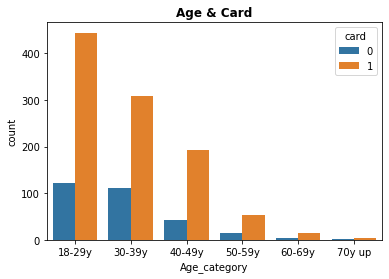

In [13]:
plt.legend() 
plt.title("Age & Card",fontweight='bold')
plt.xlabel("年齡")
plt.ylabel("count")
data= data.rename(columns={'age_category': 'Age_category'})

sns.countplot(data['Age_category'],hue=data['card'],order= data['Age_category'].value_counts().index)

In [14]:
import plotly.express as px
from pandasgui import show


fig = px.bar(data_frame=data_age, x='age_category', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="年齡區間成功核卡率長條圖")
fig.update_xaxes(title_text="年齡")
fig.update_yaxes(title_text="核卡成功率")
fig.show()

## 3. 年收入(Income)欄位視覺化&交叉分析

In [15]:
layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(x=data['income'],name="",boxmean=True))
fig.update_layout(title_text="年收入箱型圖")
fig.update_xaxes(title_text="年收入 (單位: $ 10,000)")
fig.show()

layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Histogram(x=data['age'],name=''))
fig.update_layout(title_text="年收入分布")
fig.update_xaxes(title_text="年收入 (單位: $ 1,000)")
fig.update_yaxes(title_text="count")
fig.show()

gm = pd.Series(data=data['income'])
print(gm.mode()[0])

3.0


In [16]:
#年收入區間
def income_avg(income):
    if income >= 8 :
        income_cat='80k UP'
    elif income>= 6 and income< 8:
        income_cat='60-79k'
    elif income>= 4 and income< 6:
        income_cat='40-59k'
    elif income>= 2 and income< 4:
        income_cat='20-39k'
    else:
        income_cat='20K BL'
    return income_cat

In [17]:
data['income_category']=data['income'].apply(income_avg)

data_card = data[data['card'] == 1]
data_income = data[['income_category','card']].groupby(['income_category']).count().reset_index()
data_income = data_income.rename(columns={'card': 'num_people'})

data_income['h_card'] = data_card[['income_category','card']].groupby(['income_category']).count().reset_index()['card']

data_income['核卡成功率'] = ((data_income['h_card']/data_income['num_people'])*100).round(2)

data_income =data_income.reindex(columns=['income_category','h_card','num_people','核卡成功率'])
data_income.sort_values(by=['核卡成功率'],ascending=False)

,income_category,h_card,num_people,核卡成功率
3,60-79k,61,71,85.92
2,40-59k,180,225,80.00
0,20-39k,629,790,79.62
4,80k UP,27,35,77.14
1,20K BL,120,191,62.83


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Income & Card'}, xlabel='Income_category', ylabel='count'>

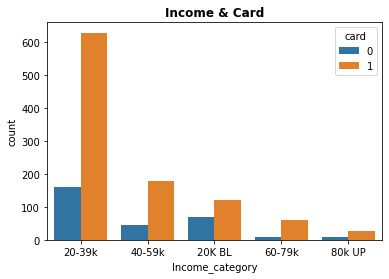

In [18]:
plt.legend() 
plt.title("Income & Card",fontweight='bold')
plt.xlabel("年收入")
plt.ylabel("count")
data= data.rename(columns={'income_category': 'Income_category'})

sns.countplot(data['Income_category'],hue=data['card'],order= data['Income_category'].value_counts().index)

In [19]:
fig = px.bar(data_frame=data_income, x='income_category', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="年收入區間成功核卡率長條圖")
fig.update_xaxes(title_text="年收入")
fig.update_yaxes(title_text="核卡成功率")

fig.show()

## 4. 是否擁有房地產(Owner)欄位視覺化&交叉分析 

In [20]:
data['card'] = data['card'].map({ 1:'yes', 0:'no'})

In [21]:
owner = data['owner'].value_counts()
owner

no     733
yes    579
Name: owner, dtype: int64

In [22]:
fig=ex.pie(data,names='owner',title='信用卡核准比率',width=550, height=500)
fig.show()

In [23]:
ct = pd.crosstab(data.owner,data.card)

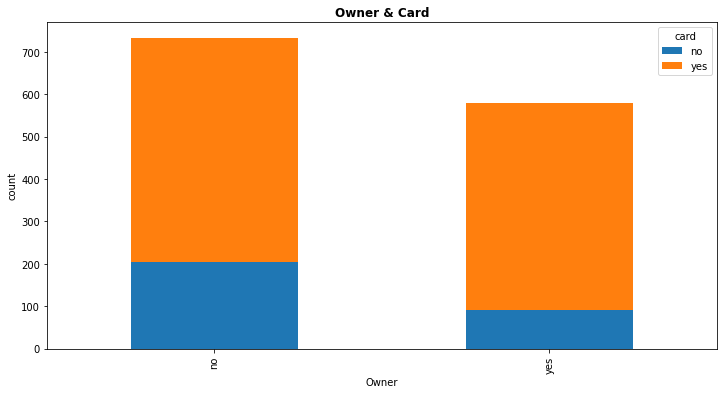

In [24]:
ct = pd.crosstab(data.owner, data.card)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.xlabel("Owner")
plt.ylabel("count")
plt.title("Owner & Card",fontweight='bold')
plt.show()

In [25]:
data_card = data[data['card'] == 'yes']
data_owner = data[['owner','card']].groupby(['owner']).count().reset_index()

data_owner = data_owner.rename(columns={'card': 'count'})
data_owner['card'] = data_card[['owner','card']].groupby(['owner']).count().reset_index()['card']
data_owner['ratio'] = data_owner['card']/data_owner['count']
data_owner['ratio'] =data_owner['ratio']*100
data_owner

,owner,count,card,ratio
0,no,733,528,72.032742
1,yes,579,489,84.455959


In [26]:
fig = px.bar(data_frame=data_owner, x='owner', y='ratio', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="房地產成功核卡率長條圖")
fig.update_xaxes(title_text="房地產")
fig.update_yaxes(title_text="核卡成功率")
fig.show()

## 5. 創業人士(selfemp)欄位視覺化&交叉分析

In [27]:
fig=ex.pie(data,names='selfemp',title='創業比率',width=550, height=500)
fig.show()

In [28]:
pd.crosstab(data.selfemp,data.card)

card,no,yes
selfemp,,
no,267,954
yes,28,63


In [29]:
data['owner'].replace('yes', '0', inplace=True)
data['owner'].replace('no', '1', inplace=True)

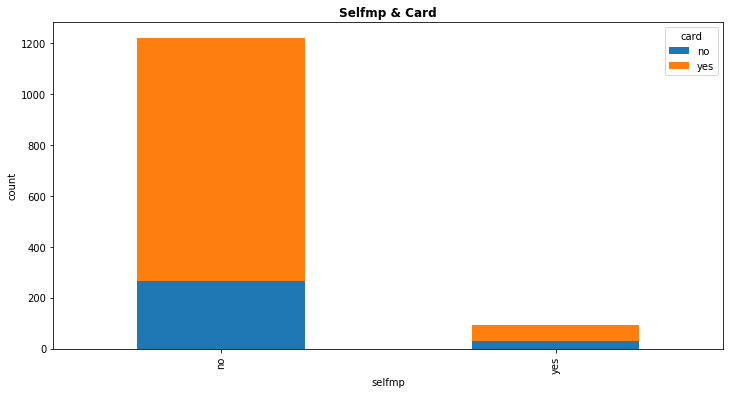

In [30]:
ct = pd.crosstab(data.selfemp, data.card)
ct.plot.bar(figsize = (12, 6), stacked=True)
plt.xlabel("selfmp")
plt.ylabel("count")
plt.title("Selfmp & Card",fontweight='bold')
plt.show()

In [31]:
data_card = data[data['card'] == 'yes']
data_mp = data[['selfemp','card']].groupby(['selfemp']).count().reset_index()

data_mp = data_mp.rename(columns={'card': 'count'})
data_mp['card'] = data_card[['selfemp','card']].groupby(['selfemp']).count().reset_index()['card']
data_mp['ratio'] = data_mp['card']/data_mp['count']*100
data_mp

,selfemp,count,card,ratio
0,no,1221,954,78.132678
1,yes,91,63,69.230769


In [32]:
fig = px.bar(data_frame=data_mp, x='selfemp', y='ratio', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="創業人士成功核卡率長條圖")
fig.update_xaxes(title_text="創業人士")
fig.update_yaxes(title_text="核卡成功率")
fig.show()

## 6. Dependents 扶養人數

In [33]:
data['dependents'].value_counts()

0    655
1    266
2    218
3    113
4     44
5      9
6      7
Name: dependents, dtype: int64

In [34]:
f=data[data['age']>5]
data.reset_index(drop=True, inplace=True)
data.index
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Age_category,Income_category
0,yes,0,38.0,4.5200,0.033270,124.983300,0,no,3,54,1,12,30-39y,40-59k
1,yes,0,33.0,2.4200,0.005217,9.854167,1,no,3,34,1,13,30-39y,20-39k
2,yes,0,34.0,4.5000,0.004156,15.000000,0,no,4,58,1,5,30-39y,40-59k
3,yes,0,30.0,2.5400,0.065214,137.869200,1,no,0,25,1,7,30-39y,20-39k
4,yes,0,32.0,9.7867,0.067051,546.503300,0,no,2,64,1,5,30-39y,80k UP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,yes,0,34.0,4.5660,0.002146,7.333333,0,no,0,94,1,19,30-39y,40-59k
1308,no,5,24.0,3.1920,0.000376,0.000000,1,no,3,12,1,5,18-29y,20-39k
1309,yes,0,41.0,4.6000,0.026513,101.298300,0,no,2,1,1,2,40-49y,40-59k
1310,yes,0,33.0,3.7000,0.008999,26.996670,1,yes,0,60,1,7,30-39y,20-39k


In [35]:
#box chart
import plotly.express as px
fig = px.box(data, x="dependents")
fig.update_layout(height=430, width=750, title_text="扶養人數_箱形圖",xaxis_title="扶養人數")
fig.show()

In [36]:
#histogram
import plotly.express as px
fig = px.histogram(data, x="dependents")
fig.update_layout(height=438, width=750, title_text="扶養人數_直方圖",xaxis_title="扶養人數")
fig.show()

In [37]:
stack_chart = pd.crosstab(data.dependents,data.card)
x0=stack_chart
x0=x0.reset_index()
x0['核卡成功率']=round(x0['yes']/(x0['yes']+x0['no']),2)
x0['核卡成功率']=x0['核卡成功率']*100
x0

card,dependents,no,yes,核卡成功率
0,0,138,517,79.0
1,1,54,212,80.0
2,2,63,155,71.0
3,3,27,86,76.0
4,4,9,35,80.0
5,5,2,7,78.0
6,6,2,5,71.0


In [38]:
fig = px.bar(data_frame=x0, x='dependents', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="扶養人數核卡率長條圖")
fig.update_xaxes(title_text="扶養人數")
fig.show()

## 7. Year 居住時間

In [39]:
#box chart
import plotly.express as px
fig = px.box(data, x="months")
fig.update_layout(height=438, width=750, title_text="居住時間(月)__箱形圖",xaxis_title="居住時間(月)")
fig.show()

In [40]:
#histogram
import plotly.express as px
fig = px.histogram(data, x="months")
fig.update_layout(height=438, width=750, title_text="居住時間(月)__箱形圖",xaxis_title="居住時間(月)")
fig.show()

In [41]:
data['years'] = round(data['months']/12,1)
data.drop(columns = 'months',axis=1,inplace=True)
data.describe()

,reports,age,income,share,expenditure,dependents,majorcards,active,years
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.458079,33.381860,3.367257,0.068636,184.970390,0.993902,0.817835,6.999238,4.597332
std,1.348416,9.899483,1.697377,0.094787,272.714742,1.247408,0.386127,6.314718,5.521508
min,0.000000,18.000000,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,2.237125,0.002208,4.583333,0.000000,1.000000,2.000000,1.000000
50%,0.000000,31.000000,2.900000,0.038775,101.231650,1.000000,1.000000,6.000000,2.500000
75%,0.000000,39.000000,4.000000,0.093516,248.970800,2.000000,1.000000,11.000000,6.000000
max,14.000000,84.000000,13.500000,0.906320,3099.505000,6.000000,1.000000,46.000000,45.000000


In [42]:
data.years.value_counts()

1.0     101
2.0      70
0.5      58
1.2      57
0.2      50
       ... 
19.4      1
5.4       1
11.1      1
15.2      1
19.7      1
Name: years, Length: 166, dtype: int64

In [43]:
#box chart
import plotly.express as px
fig = px.box(data, x="years")
fig.update_layout(height=438, width=750, title_text="居住時間(年)__箱形圖",xaxis_title="居住時間(年)")
fig.show()

In [44]:
#histogram
import plotly.express as px
fig = px.histogram(data, x="years")
fig.update_layout(height=438, width=750, title_text="居住時間(年)_直方圖",xaxis_title="居住時間(年)")
fig.show()

In [45]:
data['years'].describe()

count    1312.000000
mean        4.597332
std         5.521508
min         0.000000
25%         1.000000
50%         2.500000
75%         6.000000
max        45.000000
Name: years, dtype: float64

In [46]:
for i in range(1312):
    if 0 <= data['years'][i] <= 5:
        data['years'][i] = '0~5'
    elif 5 < data['years'][i] <= 10:
        data['years'][i] = '5~10'
    elif 10 <data['years'][i] <= 15:
        data['years'][i] = '10~15'
    elif 15 < data['years'][i] <= 20:
        data['years'][i] = '15~20'
    elif 20 <data['years'][i] <= 25:
        data['years'][i] = '20~25'
    elif 25 < data['years'][i] <= 30:
        data['years'][i] = '25~30'
    elif 30 <data['years'][i] <= 35:
        data['years'][i] = '30~35'
    elif 35 < data['years'][i] <= 40:
        data['years'][i] = '35~40'
    elif 40 <data['years'][i] <= 45:
        data['years'][i] = '40~45'

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\

In [47]:
stack_chart = pd.crosstab(data.years,data.card)
x1=pd.concat([stack_chart.iloc[[0]],stack_chart.iloc[[8]]], axis=0)
x1=pd.concat([x1,stack_chart.iloc[1:8]],axis=0)
x1=x1.reset_index()
x1['核卡成功率']=round(x1['yes']/(x1['yes']+x1['no']),2)
x1['核卡成功率']= x1['核卡成功率']*100
x1

card,years,no,yes,核卡成功率
0,0~5,215,729,77.0
1,5~10,54,150,74.0
2,10~15,11,82,88.0
3,15~20,6,34,85.0
4,20~25,3,17,85.0
5,25~30,1,2,67.0
6,30~35,3,1,25.0
7,35~40,1,0,0.0
8,40~45,1,2,67.0


In [48]:
fig = px.bar(data_frame=x1 ,x='years', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="居住時間核卡率長條圖")
fig.update_xaxes(title_text="居住時間")

fig.show()



## 8. Majorcards 主卡數量

In [49]:
#box chart
fig = px.pie(data, names='majorcards')
fig.update_layout(height=438, width=750, title_text="主卡數量__圓餅圖")
fig.show()

In [50]:
stack_chart2 = pd.crosstab(data.majorcards,data.card)
x2=stack_chart2.reset_index()
x2['核卡成功率']=round(x2['yes']/(x2['yes']+x2['no']),2)*100
x2

card,majorcards,no,yes,核卡成功率
0,0,76,163,68.0
1,1,219,854,80.0


In [51]:
fig = px.bar(data_frame=x2,x='majorcards', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="主卡數量核卡率長條圖")
fig.update_xaxes(title_text="主卡數量")

fig.show()

## 9. Active活躍用戶帳戶數量

In [52]:
#box chart
fig = px.box(data, x="active")
fig.update_layout(height=438, width=750, title_text="活躍信用帳戶數量__箱形圖",xaxis_title="活躍信用帳戶數量")
fig.show()

In [53]:
#histogram
fig = px.histogram(data, x="active")
fig.update_layout(height=438, width=750, title_text="活躍信用帳戶數量__箱形圖",xaxis_title="活躍信用帳戶數量")
fig.show()

In [54]:
print(len(data['active'].unique()))
data['active'].value_counts()

35


0     219
2      91
3      91
4      83
5      83
7      82
1      73
6      72
9      70
11     63
8      62
10     44
13     42
12     38
14     30
16     29
15     27
17     23
19     21
18     20
20      9
22      9
21      7
23      5
25      4
27      3
28      2
29      2
31      2
33      1
44      1
26      1
32      1
24      1
46      1
Name: active, dtype: int64

In [55]:
#class
for i in range(1312):
    if 0 <= data['active'][i] <= 3:
        data['active'][i] = '0~3'
    elif 3 < data['active'][i] <= 6:
        data['active'][i] = '3~6'
    elif 6 <data['active'][i] <= 9:
        data['active'][i] = '6~9'
    elif 9 < data['active'][i] <= 12:
        data['active'][i] = '9~12'
    elif 12 <data['active'][i] <= 15:
        data['active'][i] = '12~15'
    elif 15 < data['active'][i] <= 18:
        data['active'][i] = '15~18'
    elif 18 <data['active'][i] <= 21:
        data['active'][i] = '18~21'
    elif 21 < data['active'][i] <= 25:
        data['active'][i] = '21~25'
    elif 25 <data['active'][i] :
        data['active'][i] = '25~46'

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roamin

In [56]:
stack_chart3 = pd.crosstab(data.active,data.card)
x3=pd.concat([stack_chart3.iloc[[0]],stack_chart3.iloc[6:]], axis = 0)
x3=pd.concat([x3,stack_chart3.iloc[1:6]],axis=0)
x3=x3.reset_index()
x3['核卡成功率']=round(x3.yes/(x3.yes+x3.no),2)
x3['核卡成功率'] = x3['核卡成功率']*100
x3

card,active,no,yes,核卡成功率
0,0~3,138,336,71.0
1,3~6,43,195,82.0
2,6~9,43,171,80.0
3,9~12,29,116,80.0
4,12~15,17,82,83.0
5,15~18,11,61,85.0
6,18~21,6,31,84.0
7,21~25,3,16,84.0
8,25~46,5,9,64.0


In [57]:
fig = px.bar(data_frame=x3 ,x='active', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="活躍信用帳戶數量核卡率長條圖")
fig.update_xaxes(title_text="活躍信用帳戶數量")

fig.show()

## 10. Report 信用不良紀錄

In [58]:
data['card'] = data['card'].map({'yes': 1, 'no': 0})
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,majorcards,active,Age_category,Income_category,years
0,1,0,38.0,4.5200,0.033270,124.983300,0,no,3,1,9~12,30-39y,40-59k,0~5
1,1,0,33.0,2.4200,0.005217,9.854167,1,no,3,1,12~15,30-39y,20-39k,0~5
2,1,0,34.0,4.5000,0.004156,15.000000,0,no,4,1,3~6,30-39y,40-59k,0~5
3,1,0,30.0,2.5400,0.065214,137.869200,1,no,0,1,6~9,30-39y,20-39k,0~5
4,1,0,32.0,9.7867,0.067051,546.503300,0,no,2,1,3~6,30-39y,80k UP,5~10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1,0,34.0,4.5660,0.002146,7.333333,0,no,0,1,18~21,30-39y,40-59k,5~10
1308,0,5,24.0,3.1920,0.000376,0.000000,1,no,3,1,3~6,18-29y,20-39k,0~5
1309,1,0,41.0,4.6000,0.026513,101.298300,0,no,2,1,0~3,40-49y,40-59k,0~5
1310,1,0,33.0,3.7000,0.008999,26.996670,1,yes,0,1,6~9,30-39y,20-39k,0~5


In [59]:
mask1 = data['card'] == 1
mask2 = data['reports'] > 0
Y_HR = data[(mask1 & mask2)] 
Y_HR =Y_HR[['card','reports']]
len(Y_HR['reports'])

mask3 = data['card'] == 1
mask4 = data['reports'] == 0
Y_NR = data[(mask3 & mask4)] 
Y_NR =Y_NR[['card','reports']]
len(Y_NR['reports'])

mask5 = data['card'] != 1
mask6 = data['reports'] == 0
N_HR = data[(mask5 & mask6)] 
N_HR =N_HR[['card','reports']]
len(N_HR['reports'])

mask7 = data['card'] != 1
mask8 = data['reports'] > 0
N_NR = data[(mask7 & mask8)] 
N_NR =N_NR[['card','reports']]
len(N_NR['reports'])

check_c_rs={'Yes':{'有R':len(Y_NR['reports']),'無R':len(Y_HR['reports'])}
            ,'No':{'有R':len(N_HR['reports']),'無R':len(N_NR['reports'])}}
check_c_rs=pd.DataFrame(check_c_rs)
print(check_c_rs)

    Yes   No
有R  910  144
無R  107  151


In [60]:
data1 = [['Yes',910,144],['No',107,151]]
df = pd.DataFrame(data1,columns=['是否有信用不良紀錄','通過核卡人數','不通過核卡人數']) 
df

,是否有信用不良紀錄,通過核卡人數,不通過核卡人數
0,Yes,910,144
1,No,107,151


In [61]:
fig = px.bar(data_frame=df, x='是否有信用不良紀錄', y='通過核卡人數', color=None, facet_row=None,
    facet_col=None, )
fig.update_layout(title_text="通過核卡申辦者&信用紀錄")
fig.show()

In [62]:
fig = px.bar(data_frame=df, x='是否有信用不良紀錄', y='不通過核卡人數', color=None, facet_row=None,
    facet_col=None, )
fig.update_layout(title_text="沒有通過核卡申辦者&信用紀錄")
fig.show()

In [63]:
stack_chart6 = pd.crosstab(data.reports,data.card)
x6=pd.concat([stack_chart6.iloc[[0]],stack_chart6.iloc[6:]], axis = 0)
x6=pd.concat([x6,stack_chart6.iloc[1:6]],axis=0)
x6=x6.reset_index()

In [64]:
x6.columns = ['reports','no','yes']
x6

,reports,no,yes
0,0,144,910
1,6,5,0
2,7,6,0
3,9,2,0
4,10,1,0
5,11,4,0
6,12,1,0
7,14,1,0
8,1,47,89
9,2,37,13


In [65]:
x6['核卡成功率']=round(x6.yes/(x6.yes+x6.no),2)
x6['核卡成功率'] = x6['核卡成功率']*100

In [66]:
fig = px.bar(data_frame=x6 ,x='reports', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="信用不良紀錄核卡率長條圖")
fig.update_xaxes(title_text="信用不良紀錄數量")

In [67]:
data['card'] = data['card'].map({1: 'yes', 0: 'no'})
data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,majorcards,active,Age_category,Income_category,years
0,yes,0,38.0,4.5200,0.033270,124.983300,0,no,3,1,9~12,30-39y,40-59k,0~5
1,yes,0,33.0,2.4200,0.005217,9.854167,1,no,3,1,12~15,30-39y,20-39k,0~5
2,yes,0,34.0,4.5000,0.004156,15.000000,0,no,4,1,3~6,30-39y,40-59k,0~5
3,yes,0,30.0,2.5400,0.065214,137.869200,1,no,0,1,6~9,30-39y,20-39k,0~5
4,yes,0,32.0,9.7867,0.067051,546.503300,0,no,2,1,3~6,30-39y,80k UP,5~10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,yes,0,34.0,4.5660,0.002146,7.333333,0,no,0,1,18~21,30-39y,40-59k,5~10
1308,no,5,24.0,3.1920,0.000376,0.000000,1,no,3,1,3~6,18-29y,20-39k,0~5
1309,yes,0,41.0,4.6000,0.026513,101.298300,0,no,2,1,0~3,40-49y,40-59k,0~5
1310,yes,0,33.0,3.7000,0.008999,26.996670,1,yes,0,1,6~9,30-39y,20-39k,0~5


## 11. Expenditure 信用卡每月平均消費金額

In [68]:
expenditure = data['expenditure'].value_counts()
expenditure

0.000000      316
4.583333        9
8.333333        8
7.083333        5
3.750000        2
             ... 
105.125000      1
77.356670       1
13.402500       1
142.877500      1
83.083340       1
Name: expenditure, Length: 975, dtype: int64

In [69]:
data["expenditure"]=data["expenditure"].round(2)
data["expenditure"]

0       124.98
1         9.85
2        15.00
3       137.87
4       546.50
         ...  
1307      7.33
1308      0.00
1309    101.30
1310     27.00
1311    344.16
Name: expenditure, Length: 1312, dtype: float64

In [70]:
layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(x=data['expenditure'],name="",boxmean=True))
fig.update_layout(title_text="消費支出箱型圖")
fig.update_xaxes(title_text="消費支出")
fig.show()

In [71]:
layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Histogram(x=data['expenditure'],name=''))
fig.update_layout(title_text="消費支出分布")
fig.update_xaxes(title_text="消費支出")
fig.update_yaxes(title_text="count")
fig.show()

In [72]:
ex_sort = data.sort_values(by='expenditure',ascending=True)
ex_sort

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,majorcards,active,Age_category,Income_category,years
655,no,0,24.0,2.5500,0.000471,0.00,0,no,2,1,0~3,18-29y,20-39k,0~5
1087,no,0,56.0,1.4500,0.000828,0.00,0,no,0,1,3~6,50-59y,20K BL,20~25
320,no,0,26.0,1.5000,0.000800,0.00,1,no,0,1,0~3,18-29y,20K BL,0~5
319,no,2,28.0,2.6000,0.000462,0.00,0,no,2,1,0~3,18-29y,20-39k,0~5
318,no,0,24.0,1.2000,0.001000,0.00,1,no,0,0,0~3,18-29y,20K BL,0~5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,yes,0,27.0,2.6000,0.877846,1902.00,1,no,0,1,6~9,18-29y,20-39k,0~5
758,yes,0,44.0,9.0000,0.259993,1949.86,1,no,2,1,6~9,40-49y,80k UP,0~5
1182,yes,0,47.0,10.4000,0.230948,2001.55,0,no,2,0,0~3,40-49y,80k UP,0~5
756,yes,0,35.0,6.0000,0.458235,2291.17,1,no,2,1,0~3,30-39y,60-79k,0~5


In [73]:
for i in range(1312):
    a = ex_sort["expenditure"][i]
    if a <= 5 :
        ex_sort["expenditure"][i] = "<5"
    elif 5 < a <= 20:
        ex_sort["expenditure"][i] = "5-20"
    elif 20 < a <= 50:
        ex_sort["expenditure"][i] = "20-50"
    elif 50 < a <= 100:
        ex_sort["expenditure"][i] = "50-100"
    elif 100 < a <= 500:
        ex_sort["expenditure"][i] = "100-500"
    elif 500 < a <= 1000:
        ex_sort["expenditure"][i] = "500-1000"
    else:
        ex_sort["expenditure"][i] = "1000-"
ex_sort["expenditure"]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming

655        <5
1087       <5
320        <5
319        <5
318        <5
        ...  
619     1000-
758     1000-
1182    1000-
756     1000-
443     1000-
Name: expenditure, Length: 1312, dtype: object

In [76]:
stack_chart = pd.crosstab(ex_sort.expenditure,ex_sort.card)
x4=stack_chart
x4=x4.reset_index()

x4['核卡成功率']=round(x4['yes']/(x4['yes']+x4['no']),2)
x4['核卡成功率']=x4['核卡成功率']*100
x4

card,expenditure,no,yes,核卡成功率
0,100-500,0,549,100.0
1,1000-,0,21,100.0
2,20-50,0,101,100.0
3,5-20,0,65,100.0
4,50-100,0,156,100.0
5,500-1000,0,90,100.0
6,<5,295,35,11.0


In [77]:
fig = px.bar(data_frame=x4,x='expenditure', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="消費支出核卡率長條圖")
fig.update_xaxes(title_text="消費支出")

fig.show()

## 12. Share 信用卡支出占比

In [80]:
share = data['share'].value_counts()
share

0.000480    12
0.000667    11
0.000600    11
0.000400    10
0.000462    10
            ..
0.023580     1
0.051140     1
0.000517     1
0.002627     1
0.340636     1
Name: share, Length: 1156, dtype: int64

In [81]:
data['share'] = data['share']*100
data["share"]=data["share"].round(2)
data["share"]

0        3.33
1        0.52
2        0.42
3        6.52
4        6.71
        ...  
1307     0.21
1308     0.04
1309     2.65
1310     0.90
1311    11.16
Name: share, Length: 1312, dtype: float64

In [82]:

layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Box(x=data['share'],name="",boxmean=True))
fig.update_layout(title_text="信用卡支出佔比箱型圖")
fig.update_xaxes(title_text="信用卡支出佔比")
fig.show()

In [83]:
layout = go.Layout(autosize=False,width=570,height=332)
fig = go.Figure(layout=layout)
fig.add_trace(go.Histogram(x=data['share'],name='分布圖'))
fig.update_layout(title_text="信用卡支出佔比分布")
fig.update_xaxes(title_text="信用卡支出佔比")
fig.update_yaxes(title_text="count")
fig.show()

In [84]:
share_sort = data.sort_values(by='share',ascending=True)
share_sort

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,majorcards,active,Age_category,Income_category,years
604,no,0,48.0,8.4000,0.01,0.00,0,no,3,1,0~3,40-49y,80k UP,0~5
1274,no,0,21.0,9.9999,0.01,0.00,1,no,2,0,0~3,18-29y,80k UP,0~5
1232,no,0,53.0,11.0000,0.01,0.00,0,yes,0,1,0~3,50-59y,80k UP,35~40
820,no,1,55.0,9.4000,0.01,0.00,0,no,1,0,0~3,50-59y,80k UP,5~10
839,no,0,38.0,9.0000,0.01,0.00,1,no,0,1,0~3,30-39y,80k UP,10~15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,yes,1,30.0,3.7000,59.58,1836.98,1,no,0,1,6~9,30-39y,20-39k,0~5
1284,yes,0,22.0,1.7500,62.15,906.31,1,no,0,1,0~3,18-29y,20K BL,0~5
1174,yes,0,23.0,2.6000,82.46,1786.28,1,no,0,1,0~3,18-29y,20-39k,0~5
619,yes,0,27.0,2.6000,87.78,1902.00,1,no,0,1,6~9,18-29y,20-39k,0~5


In [85]:
for i in range(1312):
    a = share_sort["share"][i]
    if a <= 1 :
        share_sort["share"][i] = "<1"
    elif 1 < a <= 5:
        share_sort["share"][i] = "1-5"
    elif 5 < a <= 10:
        share_sort["share"][i] = "5-10"
    elif 10 < a <= 20:
        share_sort["share"][i] = "10-20"
    elif 20 < a <= 30:
        share_sort["share"][i] = "20-30"
    elif 30 < a <= 40:
        share_sort["share"][i] = "30-40"
    elif 40 < a <= 50:
        share_sort["share"][i] = "40-50"
    else:
        share_sort["share"][i] = "50-"
share_sort["share"]

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Roaming\

604      <1
1274     <1
1232     <1
820      <1
839      <1
       ... 
582     50-
1284    50-
1174    50-
619     50-
457     50-
Name: share, Length: 1312, dtype: object

In [86]:
stack_chart = pd.crosstab(share_sort.share,share_sort.card)
x5=stack_chart
x5=x5.reset_index()
x5['核卡成功率']=round(x5['yes']/(x5['yes']+x5['no']),2)
x5['核卡成功率']=x5['核卡成功率']*100
x5

card,share,no,yes,核卡成功率
0,1-5,0,330,100.0
1,10-20,0,204,100.0
2,20-30,0,62,100.0
3,30-40,0,21,100.0
4,40-50,0,6,100.0
5,5-10,0,269,100.0
6,50-,0,10,100.0
7,<1,295,115,28.0


In [87]:
fig = px.bar(data_frame=x5,x='share', y='核卡成功率', color=None,
    facet_row=None, facet_col=None, )
fig.update_layout(title_text="消費支出占比核卡率長條圖")
fig.update_xaxes(title_text="消費支出占比")

fig.show()